# Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск
1.Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [6]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [8]:
# L2 регуляризация
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1]) #вектор весов
    n = X.shape[0]

    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        dQ = 2/n * X.T @ (y_pred - y) #градиент функции ошибки
        dReg = reg * W #градиент регуляризации

        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            print(f"Iter: {i}, weigths: {W}, error {err}.")

    print(f"Final MSE: {calc_mse(y, np.dot(X,W))}")
    return W

In [9]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=0.01, reg=1e-8)

Iter: 0, weigths: [ 1.80104044  0.47740567 -0.2684289   0.17411365], error 3281.2876888349797.
Iter: 500, weigths: [56.49775575  5.95681701  1.03568155  5.4776604 ], error 25.239298595240506.
Iter: 1000, weigths: [56.49999963  6.19758436  0.13866608  6.16568526], error 24.94775977984228.
Iter: 1500, weigths: [56.49999972  6.26609518 -0.17850536  6.42479705], error 24.910207557418136.
Iter: 2000, weigths: [56.49999972  6.2898263  -0.2923768   6.51864869], error 24.905342936107544.
Iter: 2500, weigths: [56.49999972  6.29832059 -0.33334893  6.55245981], error 24.904712685551253.
Iter: 3000, weigths: [56.49999972  6.30137561 -0.34809574  6.56463137], error 24.904631030937452.
Iter: 3500, weigths: [56.49999972  6.30247511 -0.35340369  6.5690125 ], error 24.904620451694772.
Iter: 4000, weigths: [56.49999972  6.30287086 -0.35531424  6.57058946], error 24.90461908098332.
Iter: 4500, weigths: [56.49999972  6.30301331 -0.35600192  6.57115707], error 24.904618903365577.
Final MSE: 24.904618880342

array([56.49999972,  6.30306452, -0.35624916,  6.57136114])

In [10]:
# L1 регуляризация
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])#вектор весов
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) #градиент функции ошибки
        dReg = reg * np.sign(W) #градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [11]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=0.1, reg=1e-6)

Iter: 0, weights: [12.80252017  0.63948259  0.95857446  2.88270992], error 3242.7859339905654
Iter: 500, weights: [56.4999995   6.30306941 -0.3562764   6.57138418], error 24.904618879215857
Iter: 1000, weights: [56.4999995   6.30309147 -0.35638289  6.57147208], error 24.904618876914803
Iter: 1500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 2000, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.9046188769148
Iter: 2500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.9046188769148
Iter: 3000, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.9046188769148
Iter: 3500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.9046188769148
Iter: 4000, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.9046188769148
Iter: 4500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.9046188769148
Final MSE: 24.9046188769148


array([56.4999995 ,  6.30309147, -0.3563829 ,  6.57147208])

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Не стоит использовать нормализацию и стандартизацию.

3. Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [12]:
from sklearn import datasets

X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1,
                                      noise=1, coef=True, random_state=2)
display(X, Y, coef)

array([[-0.71760732, -1.09367119, -0.73597009, ..., -0.09194752,
         0.77271648, -0.5294093 ],
       [-0.21856062, -0.43937009,  1.17601766, ..., -0.44205731,
         0.65967443, -0.5364636 ],
       [-0.09232329, -0.04777714,  0.58128624, ..., -0.64041891,
         1.29076796, -0.34530826],
       ...,
       [-0.1724219 ,  1.20477844,  0.77081956, ...,  1.78646758,
        -0.59041036, -0.6747931 ],
       [ 0.93830193, -0.05266006,  1.45767292, ..., -1.01765261,
         0.02393901,  1.37086726],
       [-0.99582701,  1.30720547, -0.04855569, ...,  1.85683052,
        -0.26133944,  0.50888458]])

array([-136.72114621,   43.03006872,   47.20016397, ..., -271.90546582,
        161.69583213,  382.5398616 ])

array([8.03590530e+00, 9.63394753e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.86058430e+01, 0.00000000e+00, 0.00000000e+00,
       9.61298231e+01, 5.95379955e+01, 0.00000000e+00, 3.30583257e+01,
       3.71965212e+01, 6.59198012e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.78539772e+01, 0.00000000e+00, 7.36381949e+01])

In [13]:
X = standard_scale(X)

In [14]:
np.random.seed(9)
init_W = np.random.randn(X.shape[1]) # функция далее будет менять init_W - создадим копию весов
init_W2 = init_W.copy()
init_W

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02,
       -3.78361464e-01, -4.81135363e-01, -1.51733118e+00, -4.90871981e-01,
       -2.40680579e-01, -6.47947460e-01,  6.35891080e-01,  1.74011731e+00,
        2.96682218e-01,  7.07503662e-01,  1.82281576e+00,  4.30769029e-01,
        1.54272963e+00, -9.00721171e-01, -1.37125010e-01,  1.29757901e+00])

In [15]:
init_W2

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02,
       -3.78361464e-01, -4.81135363e-01, -1.51733118e+00, -4.90871981e-01,
       -2.40680579e-01, -6.47947460e-01,  6.35891080e-01,  1.74011731e+00,
        2.96682218e-01,  7.07503662e-01,  1.82281576e+00,  4.30769029e-01,
        1.54272963e+00, -9.00721171e-01, -1.37125010e-01,  1.29757901e+00])

In [16]:
# стохастический градиентный спуск
def stohastic_gradient_descent(W, X, Y, iterations, eta=1e-4, size=1):
    #n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list

In [17]:
# классический  GD
def gradient_descent(W, X, y, iterations, eta=1e-4):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [18]:
%%time
weights_GD, errors_GD, w_list_GD = gradient_descent(init_W, X, Y, iterations=5000, eta=1e-3)

Iter: 0, error 27955.867995557313
Iter: 500, error 3714.3084851909275
Iter: 1000, error 494.63547608329935
Iter: 1500, error 66.71033502378205
Iter: 2000, error 9.794882834599346
Iter: 2500, error 2.219575142474801
Iter: 3000, error 1.2106028894182448
Iter: 3500, error 1.0761197011184254
Iter: 4000, error 1.0581819756351332
Iter: 4500, error 1.055787679131315
Final MSE: 1.055467863232459
CPU times: user 1min 12s, sys: 21.2 s, total: 1min 33s
Wall time: 55.3 s


In [19]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(init_W2, X, Y, iterations=5000, eta=1e-3, size=1)

Iter: 0, error 27915.737438918863
Iter: 500, error 3898.532670395109
Iter: 1000, error 679.1622380195029
Iter: 1500, error 93.71616614148029
Iter: 2000, error 12.985183772623394
Iter: 2500, error 2.8414237057232623
Iter: 3000, error 1.3320673471104174
Iter: 3500, error 1.11646109463817
Iter: 4000, error 1.0825052037873626
Iter: 4500, error 1.0763940990913585
Final MSE: 1.0709034114873046
CPU times: user 15.5 s, sys: 3.8 s, total: 19.3 s
Wall time: 11.5 s


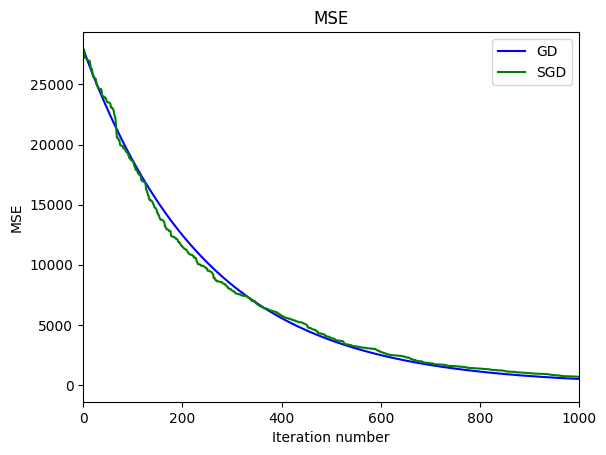

In [20]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

In [21]:
w_list_GD = np.array(w_list_GD)
w_list_SGD = np.array(w_list_SGD)

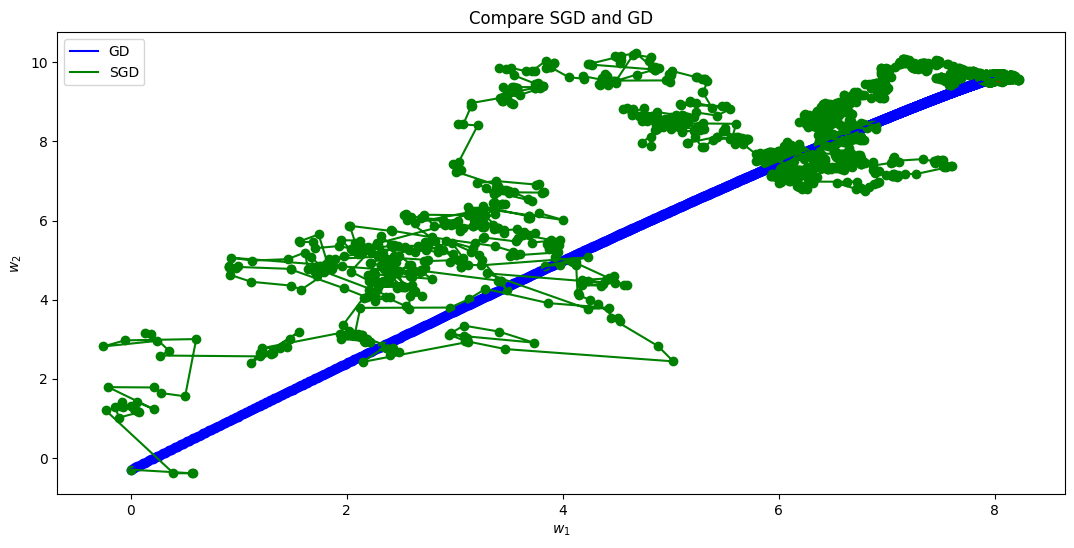

In [22]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1], color='b')
plt.plot(w_list_GD[:, 0], w_list_GD[:, 1], color='b', label='GD')

plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g')
plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g', label='SGD')
plt.scatter(coef[0], coef[1], c='r')

plt.legend()
plt.show()